<br/><br/>
<a id='Header' style="font-size:40px; color:#1D2951; text-decoration:none; text-align:center;">
    <center><b>Titanic - Machine Learning from Disaster</b></center>
</a>

<br/><br/>

<a id='Header' style="font-size:30px; color:#1D2951; text-decoration:none">
    <b> Table of Contents </b>
</a> 
<ul>
<li><a href="#intro" style="font-size:15px; color:#1D2951">Introduction</a></li>
<li><a href="#libraries" style="font-size:15px; color:#1D2951">Importing Libraries</a></li>
<li><a href="#overview" style="font-size:15px; color:#1D2951">Dataset Overview</a></li>
<li><a href="#wrangling" style="font-size:15px; color:#1D2951">Data Wrangling</a></li>
<li><a href="#eda" style="font-size:15px; color:#1D2951">Data Exploratory</a></li>
<li><a href="#dpm" style="font-size:15px; color:#1D2951">Data Preparation for Modeling</a></li>
<li><a href="#ams" style="font-size:15px; color:#1D2951">Apply Models</a></li>
<li><a href="#end" style="font-size:15px; color:#1D2951">End</a></li>

</ul>

<hr>

<a id='intro' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Introduction</b></a>

<p style="font-size:17px"> The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. <br/> While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.<br/> <br/> In this challenge, We will build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).<br/>
</p>

</p>

<a id='libraries' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Importing Libraries</b></a>

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

<a id='overview' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Dataset Overview</b></a>

In [2]:
titanic_train = pd.read_csv("train.csv")
titanic_test  = pd.read_csv("test.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_dic = {'Pclass':"Ticket class",'sibsp': "Number of siblings,spouses aboard the Titanic",
            'Parch':"Number of parents,children aboard the Titanic",'Fare':"Passenger fare",
            'Embarked': "Port of Embarkation"}
data_dic

{'Pclass': 'Ticket class',
 'sibsp': 'Number of siblings,spouses aboard the Titanic',
 'Parch': 'Number of parents,children aboard the Titanic',
 'Fare': 'Passenger fare',
 'Embarked': 'Port of Embarkation'}

<a id='wrangling' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Data Wrangling</b></a>

In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# Let's delete columns which won't affect on our model result.
for delete in [titanic_train, titanic_test]:
    del delete['Cabin']
    del delete['Ticket']
    del delete['PassengerId']
    
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


<a id='eda' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Data Exploratory</b></a>

We want to find Relation between columns to check if that affect on the percentage of saving a person.

In [7]:
titanic_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


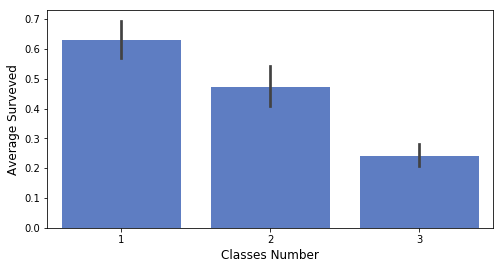

In [8]:
sns.barplot(data = titanic_train,x="Pclass", y="Survived",color="#4D76D3")
plt.xlabel("Classes Number",size=12)
plt.ylabel("Average Surveved", size=12)
plt.gcf().set_size_inches(8, 4);

We can see that the higher the degree of class, the greater the percentage of saving the people inside them

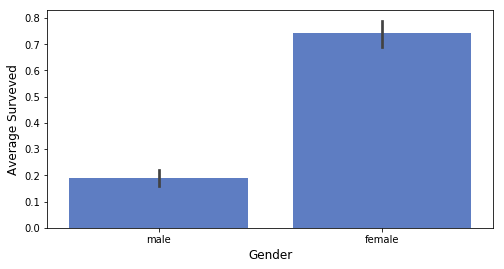

In [9]:
sns.barplot(data = titanic_train,x="Sex", y="Survived",color="#4D76D3")
plt.xlabel("Gender",size=12)
plt.ylabel("Average Surveved", size=12)
plt.gcf().set_size_inches(8, 4);

We can see that most of the women were rescued

In [10]:
#We could fill null values in Age column with this relation
# Fill null values with type of gender as most of female is survived and most of male not survived
for elem in [titanic_train, titanic_test]:
    elem['Age'] = elem.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))
    elem['Age']  = elem.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))
    elem.dropna(how= 'any', inplace = True)
    
titanic_train.info()
print('_' * 40)
titanic_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
Pclass      417 non-null int64
Name        417 non-null object
Sex         417 non-null object
Age         417 non-null float64
SibSp       417 non-null int64
Parch       417 non-null int64
Fare        417 non-null float64
Embarked    417 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 29.3+ KB


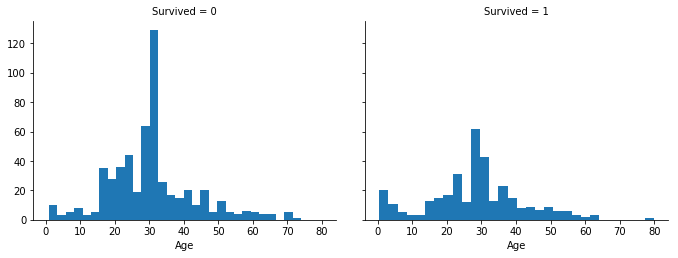

In [11]:
g = sns.FacetGrid(titanic_train, col='Survived')
g.map(plt.hist, 'Age', bins=30)
plt.gcf().set_size_inches(10, 4);

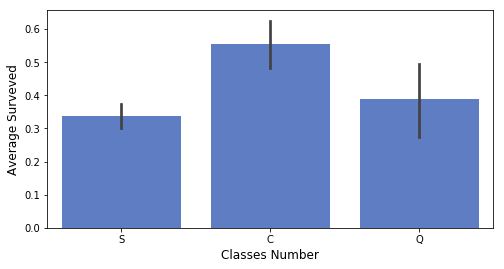

In [12]:
sns.barplot(data = titanic_train,x="Embarked", y="Survived",color="#4D76D3")
plt.xlabel("Classes Number",size=12)
plt.ylabel("Average Surveved", size=12)
plt.gcf().set_size_inches(8, 4);

Let's Check Name columns and find if the title or profession of the person affected on Suvervived percentage or not

In [13]:
for dataset in [titanic_train, titanic_test]:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    # Since there are quite a few nicknames, let's replace them with Rare 
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
del titanic_train['Name']
del titanic_test['Name']

titanic_train.groupby(['Title']).count()['Survived']

Title
Master     40
Miss      184
Mr        517
Mrs       125
Rare       23
Name: Survived, dtype: int64

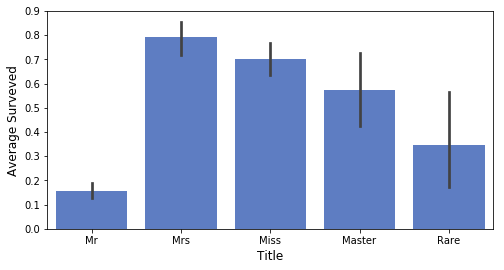

In [14]:
sns.barplot(data = titanic_train,x="Title", y="Survived",color="#4D76D3")
plt.xlabel("Title",size=12)
plt.ylabel("Average Surveved", size=12)
plt.gcf().set_size_inches(8, 4);

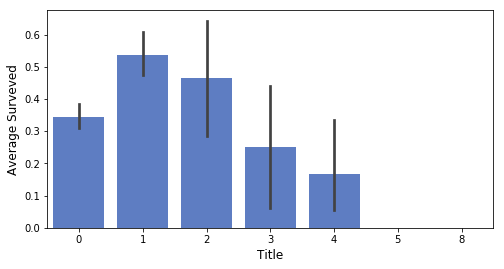

In [15]:
sns.barplot(data = titanic_train,x="SibSp", y="Survived",color="#4D76D3")
plt.xlabel("Title",size=12)
plt.ylabel("Average Surveved", size=12)
plt.gcf().set_size_inches(8, 4);

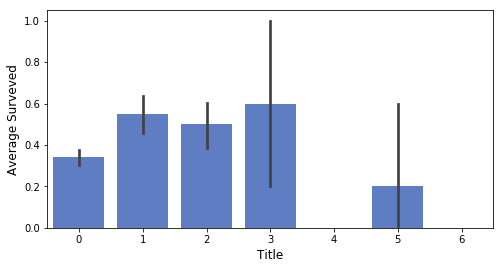

In [16]:
sns.barplot(data = titanic_train,x="Parch", y="Survived",color="#4D76D3")
plt.xlabel("Title",size=12)
plt.ylabel("Average Surveved", size=12)
plt.gcf().set_size_inches(8, 4);

<a id='dpm' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Data Preparation for Modeling</b></a>

In [17]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [18]:
# Let's convert all text to numeric values 
for gender in [titanic_train,titanic_test]:
    gender['Sex'] = gender['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for nickname in [titanic_train, titanic_test]:
    nickname['Title'] = nickname['Title'].map(title_mapping)
    nickname['Title'] = nickname['Title'].fillna(0)
    
for port in [titanic_train, titanic_test]:
    port['Embarked'] = port['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1


In [20]:
scaler = MinMaxScaler()
titanic_train[['Age', 'Fare']] = scaler.fit_transform(titanic_train[['Age', 'Fare']])
titanic_test[['Age', 'Fare']] = scaler.fit_transform(titanic_test[['Age', 'Fare']])
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,0.271174,1,0,0.014151,0,1
1,1,1,1,0.472229,1,0,0.139136,1,3
2,1,3,1,0.321438,0,0,0.015469,0,2
3,1,1,1,0.434531,1,0,0.103644,0,3
4,0,3,0,0.434531,0,0,0.015713,0,1


<a id='ams' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Apply Models</b></a>

In [21]:
X_train = titanic_train.drop("Survived", axis=1)
Y_train = titanic_train["Survived"]
X_test  = titanic_test
X_train.shape, Y_train.shape, X_test.shape

((889, 8), (889,), (417, 8))

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(f"The Accuracy of Logistic Regression Model is {acc_log} %")

The Accuracy of Logistic Regression Model is 81.55 %


C:\Users\Osama\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(f'The Accuracy of Random Forest Model is {acc_random_forest} %')

The Accuracy of Random Forest Model is 98.43 %


In [33]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(f'The Accuracy of KNN Model is {acc_knn} %')

The Accuracy of KNN Model is 97.86 %


<a id='end' style="font-size:30px; color:#1D2951; text-decoration:none"><b>End</b></a>


If you've come this far, congratulations and thank you for reading! <br>